# 🧠 ASU RoomSense: Advanced Analysis
This notebook performs deeper statistical and visual analysis on the `room_log_streamlit.csv` dataset. We simulate room occupancy and zone-based activity over time, including:
- 🔢 Occupancy Trends
- 🗺️ Zone Usage Patterns
- 🚨 Alert Detection
- 📊 Peak Times
- 📅 Day-Part Analysis
- 🔁 Rolling Averages
- 💡 Insights Summary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 🔍 Load and Preprocess Data

In [5]:
df = pd.read_csv('room_log_with_zones.csv')
df['time'] = pd.to_datetime(df['time'])
df['zones'] = df['zones'].apply(ast.literal_eval)
df.head()

,time,count,zones
0,2025-04-27 15:38:36,2,{'unknown': 2}
1,2025-04-27 15:38:38,2,{'unknown': 2}
2,2025-04-27 15:38:39,2,{'unknown': 2}
3,2025-04-27 15:38:40,2,{'unknown': 2}
4,2025-04-27 15:38:41,2,{'unknown': 2}


## 🧩 Expand Zones into Columns

In [7]:
zone_df = df['zones'].apply(pd.Series).fillna(0).astype(int)
zone_df['time'] = df['time']
zone_df = zone_df.set_index('time')
zone_df.head()

,unknown,help_desk
time,,
2025-04-27 15:38:36,2,0
2025-04-27 15:38:38,2,0
2025-04-27 15:38:39,2,0
2025-04-27 15:38:40,2,0
2025-04-27 15:38:41,2,0


## 📈 Total Occupancy Over Time

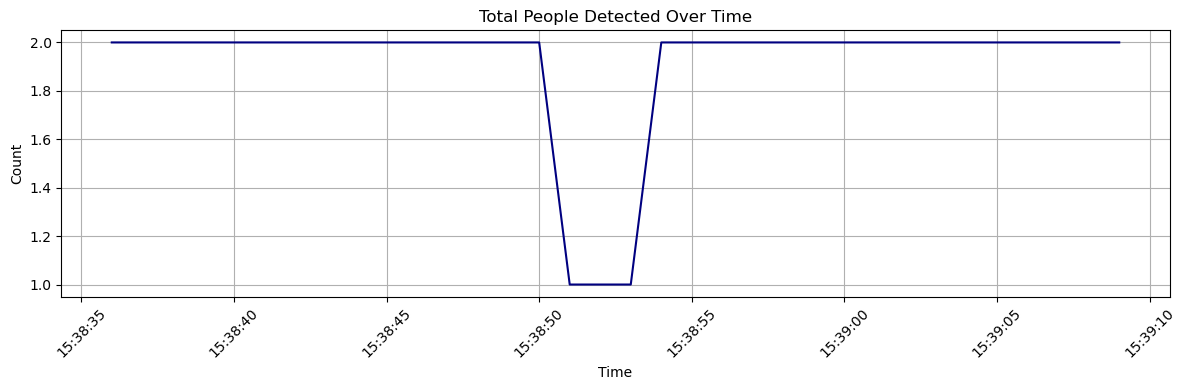

In [9]:
plt.figure(figsize=(12, 4))
sns.lineplot(x=df['time'], y=df['count'], color='navy')
plt.title('Total People Detected Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📉 Rolling Average (Smoothing)

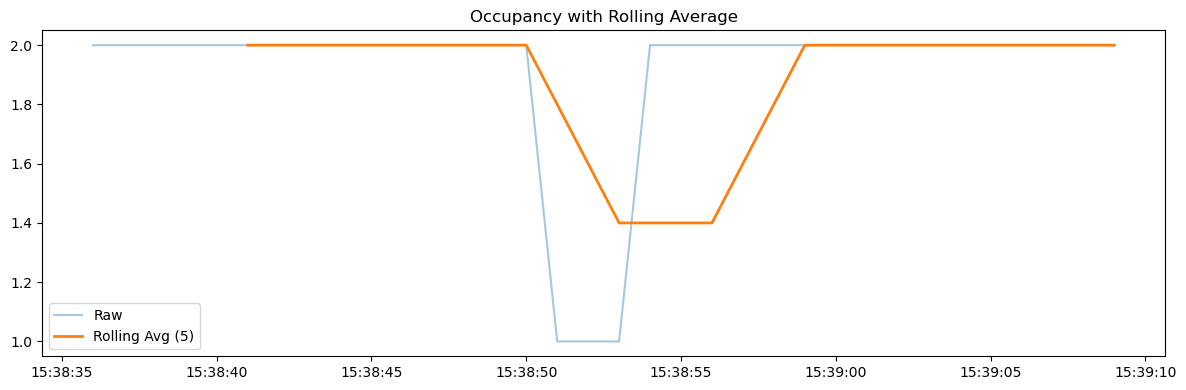

In [11]:
df['rolling_count'] = df['count'].rolling(window=5).mean()
plt.figure(figsize=(12, 4))
plt.plot(df['time'], df['count'], label='Raw', alpha=0.4)
plt.plot(df['time'], df['rolling_count'], label='Rolling Avg (5)', linewidth=2)
plt.title('Occupancy with Rolling Average')
plt.legend()
plt.tight_layout()
plt.show()

## 🌡️ Heatmap of Zone Usage

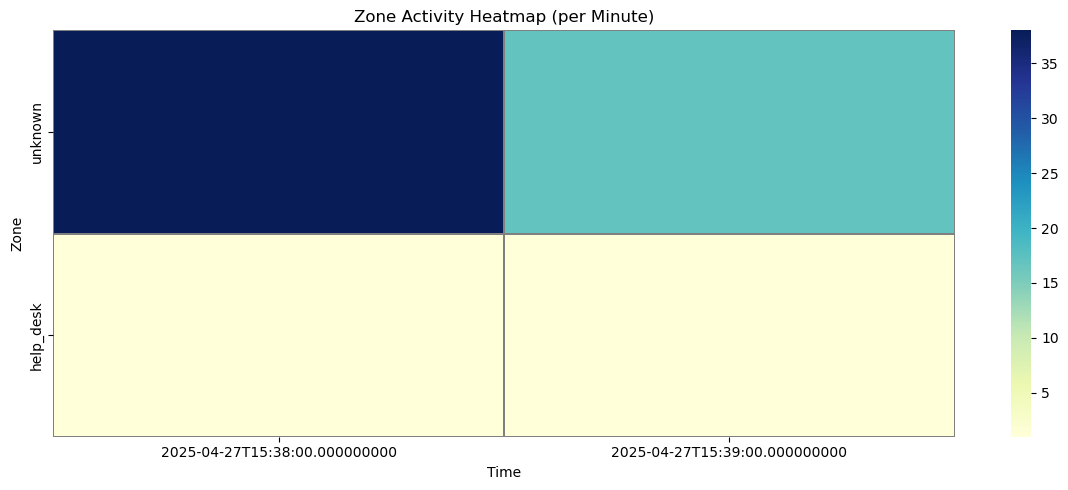

In [13]:
zone_min = zone_df.resample('1Min').sum()
plt.figure(figsize=(12, 5))
sns.heatmap(zone_min.T, cmap='YlGnBu', linewidths=0.1, linecolor='gray')
plt.title('Zone Activity Heatmap (per Minute)')
plt.xlabel('Time')
plt.ylabel('Zone')
plt.tight_layout()
plt.show()

## 🚨 Alert Detection (Threshold = 5)

In [15]:
alerts = df[df['count'] > 5]
alerts[['time', 'count']].style.highlight_max(axis=0)

,time,count


## 🕒 Peak Time Analysis

In [17]:
df['minute'] = df['time'].dt.strftime('%H:%M')
peak = df.groupby('minute')['count'].mean().sort_values(ascending=False)
peak.head(10)

minute
15:39    2.000000
15:38    1.857143
Name: count, dtype: float64

## 👑 Most Active Zones

In [19]:
zone_totals = zone_df.sum().sort_values(ascending=False)
zone_totals.head()

unknown      55
help_desk     2
dtype: int64

## 📆 Part-of-Day Patterns

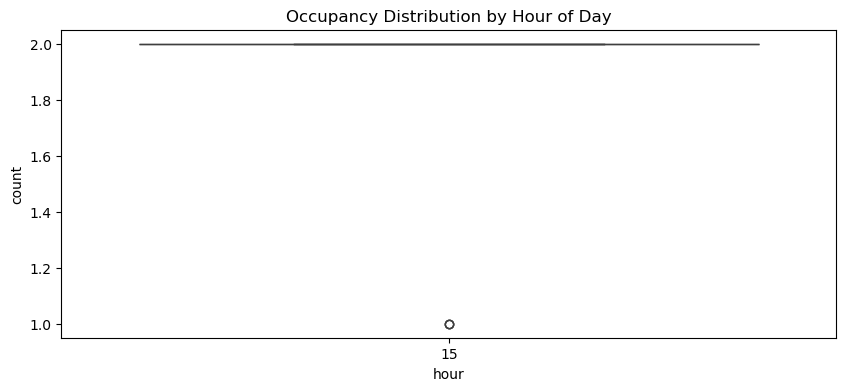

In [21]:
df['hour'] = df['time'].dt.hour
plt.figure(figsize=(10, 4))
sns.boxplot(x='hour', y='count', data=df)
plt.title('Occupancy Distribution by Hour of Day')
plt.show()